# **Case Study**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Detecting Multicollinearity**
### **Explore Multicollinearity**
Calculate the Correlation Matrix to identify multicollinearity, check the pairwise correlations between features.

In [65]:
df = pd.read_csv('/content/HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [27]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [6]:
correlation = df.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


### **1. Heatmap**

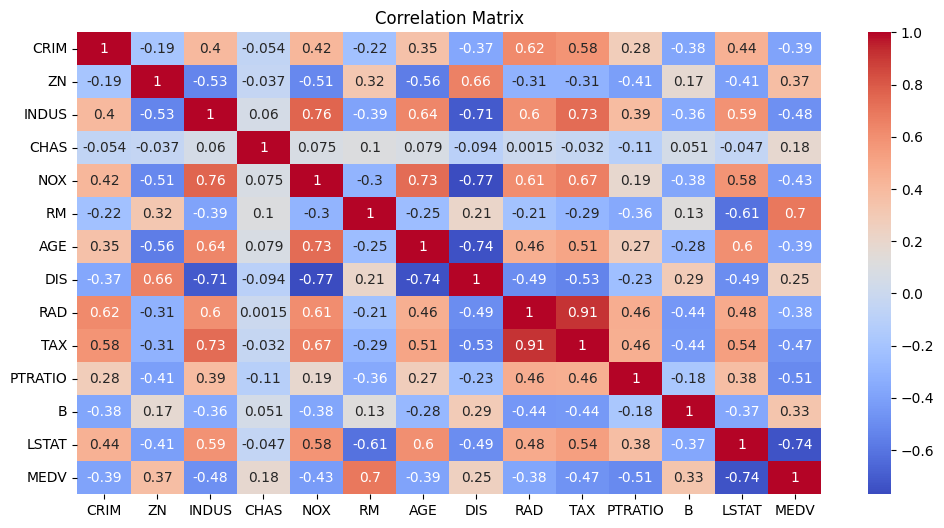

In [31]:
plt.figure(figsize = (12,6))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

* **Look for features with high correlation (e.g., > 0.8 or < -0.8).**
* **Example: TAX and RAD often exhibit high correlation in this dataset.**

### **2. Variance Inflation Factor (VIF)**

In [68]:
df.isnull().sum()/len(df)*100

,0
CRIM,3.952569
ZN,3.952569
INDUS,3.952569
CHAS,3.952569
NOX,0.000000
RM,0.000000
AGE,3.952569
DIS,0.000000
RAD,0.000000
TAX,0.000000


<Axes: >

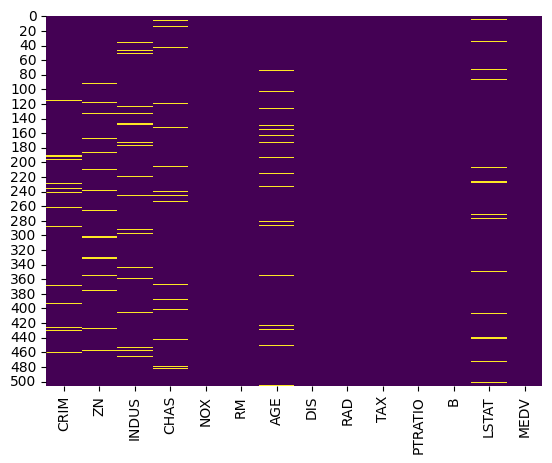

In [69]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [70]:
df = df.fillna(df.mean())

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop('MEDV', axis = 1)
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [72]:
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

   Features        VIF
0      CRIM   2.021270
1        ZN   2.690726
2     INDUS  13.582348
3      CHAS   1.149619
4       NOX  70.613690
5        RM  75.301103
6       AGE  19.805308
7       DIS  13.833517
8       RAD  15.094122
9       TAX  60.597824
10  PTRATIO  85.902410
11        B  20.144260
12    LSTAT  10.516244


* VIF close to 1 indicated no Multicollinearity
* VIF quantifies the degree of multicollinearity. A VIF > 5 (or sometimes > 10) indicates multicollinearity.

In [73]:
vif_data[vif_data['VIF'] > 10]['Features'].tolist()

['INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [74]:
X = X.drop(['PTRATIO'], axis=1)  # Example of dropping a feature

In [75]:
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

   Features        VIF
0      CRIM   2.021128
1        ZN   2.330461
2     INDUS  13.315813
3      CHAS   1.137672
4       NOX  70.612458
5        RM  57.999890
6       AGE  19.765901
7       DIS  11.488988
8       RAD  15.074143
9       TAX  58.874197
10        B  18.604279
11    LSTAT   9.511982


**We can cleary see that there is signifiacnt change in the other columns after removing the most highest VIF value i.e (change in value in "TAX" and "B")**

### **Key Takeaways**

* Multicollinearity inflates standard errors, making coefficient estimates unreliable.
* Techniques like dropping features, combining features, and using regularization can mitigate its effects.
* The Boston Housing dataset is a practical example for studying and resolving multicollinearity in real-world datasets.

### **Other Techniques**
* Combine Features
* Use Regularization Techniques

### **Document Your Observations**

* Note which features exhibited high multicollinearity.
* Explain how you addressed it (dropped features, combined, or used regularization).
* Highlight the impact on the regression results.